In [35]:
import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE')
from MPRA_exp.MPRA_predict.utils import *

In [36]:
df_0 = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_pair_align_genome.csv')
print(df_0.shape)
df_0.columns

(281321, 17)


Index(['description', 'seq_1', 'seq_2', 'A549_1', 'HepG2_1', 'K562_1',
       'SKNSH_1', 'HCT116_1', 'A549_2', 'HepG2_2', 'K562_2', 'SKNSH_2',
       'HCT116_2', 'chr', 'pos', 'ref', 'alt'],
      dtype='object')

In [37]:
df_1 = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_fold_change_new.csv')
df_1 = df_1.drop_duplicates(subset=['seq'])
df_1 = df_1.rename(columns={c: f'{c}_1' for c in df_1.columns})
print(df_1.shape)

(281321, 52)


In [38]:
df_2 = pd.read_csv('./data/Sei_Siraj_4features.csv')
df_2 = df_2.drop_duplicates(subset=['seq'])
df_2 = df_2.rename(columns={c: f'{c}_1' for c in df_2.columns})
print(df_2.shape)


df_3 = pd.read_csv('./data/Sei_Siraj_4features.csv')
df_3 = df_3.drop_duplicates(subset=['seq'])
df_3 = df_3.rename(columns={c: f'{c}_2' for c in df_3.columns})
print(df_3.shape)

(585565, 32)
(585565, 32)


In [39]:
main_df = pd.merge(df_0, df_1, left_on='seq_1', right_on='seq_1', how='left', suffixes=('', '_dup'))
main_df = pd.merge(main_df, df_2, left_on='seq_1', right_on='seq_1', how='left', suffixes=('', '_dup'))
main_df = pd.merge(main_df, df_3, left_on='seq_2', right_on='seq_2', how='left', suffixes=('', '_dup'))
main_df = main_df.rename(columns={c: c.replace('SKNSH', 'SK-N-SH') for c in main_df.columns})
main_df = main_df.loc[:, ~main_df.columns.duplicated()]
main_df = main_df[[col for col in main_df.columns if not col.endswith('_dup')]]
main_df

,description,seq_1,seq_2,A549_1,HepG2_1,K562_1,SK-N-SH_1,HCT116_1,A549_2,HepG2_2,...,SK-N-SH_CTCF_pred_logit_2,A549_DNase_pred_logit_2,A549_H3K4me3_pred_logit_2,A549_H3K27ac_pred_logit_2,A549_CTCF_pred_logit_2,HCT116_DNase_pred_logit_2,HCT116_H3K4me3_pred_logit_2,HCT116_H3K27ac_pred_logit_2,HCT116_CTCF_pred_logit_2,is_281k_2
0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,NaN,0.415984,...,-6.723535,-3.935934,-4.430842,-6.121103,-5.139558,-4.202863,-4.801554,-5.995626,-5.899889,False
1,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,NaN,1.151995,...,-8.489464,-3.276257,-6.369055,-7.888105,-7.052451,-4.185768,-7.128210,-7.231531,-7.640062,False
2,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,NaN,0.009639,...,-11.094091,-8.534698,-9.699077,-10.381806,-9.340426,-7.743531,-9.317769,-9.101093,-9.331036,False
3,chr1:108230:C:T,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,NaN,-0.737751,...,-11.056238,-7.638146,-9.621837,-10.138924,-9.425114,-7.442382,-9.369287,-9.122834,-9.547811,False
4,chr1:108826:G:C,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,NaN,0.582589,...,-9.999209,-5.898863,-8.590373,-9.780846,-8.160562,-6.777648,-8.735830,-9.109036,-8.667416,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281316,chrX:155232103:A:G,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,NaN,0.456514,...,-7.912217,-6.495944,-8.939203,-9.175887,-6.178942,-6.318472,-8.293264,-8.131998,-6.643592,False
281317,chrX:155232838:A:C,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,NaN,-0.208997,...,-0.941779,-1.148820,-5.600106,-6.820528,0.056692,-0.697794,-5.403071,-6.396735,-0.240522,False
281318,chrX:155233098:T:C,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,NaN,0.615976,...,-7.051562,-3.066585,-4.564725,-5.426208,-5.423612,-3.711086,-5.555646,-6.364144,-6.310446,False
281319,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,NaN,0.894634,...,-6.737749,-3.276394,-5.459951,-6.688350,-6.188205,-3.112125,-5.147340,-6.142751,-6.767405,False


In [40]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

In [42]:
# cell_types = ['HepG2', 'K562', 'A549', 'HCT116']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

data_split_dict = {}
data_split_dict['total'] = np.ones(len(main_df), dtype=bool)
data_split_dict['chrom'] = main_df['chr'].isin([f'chr{i}' for i in range(1, 23)])
data_split_dict['train'] = main_df['chr'].isin([f'chr{i}' for i in range(3, 23)])
data_split_dict['valid'] = main_df['chr'].isin(['chr1'])
data_split_dict['test'] = main_df['chr'].isin(['chr2'])
data_split_dict['designed'] = main_df['chr'].isin(['chr0'])

# data_split_dict['ref'] = main_df['is_ref']
# data_split_dict['alt'] = ~main_df['is_ref']

cell_types = ['HepG2_1', 'K562_1', 'SK-N-SH_1', 'A549_1', 'HCT116_1']
stds = main_df[cell_types].std(axis=1, skipna=True)
threshold = np.percentile(stds.dropna(), 90)
data_split_dict['diff'] = (stds > threshold)
data_split_dict['const'] = ~data_split_dict['diff']

In [43]:
print(list(main_df.columns))

['description', 'seq_1', 'seq_2', 'A549_1', 'HepG2_1', 'K562_1', 'SK-N-SH_1', 'HCT116_1', 'A549_2', 'HepG2_2', 'K562_2', 'SK-N-SH_2', 'HCT116_2', 'chr', 'pos', 'ref', 'alt', 'is_ref_1', 'chr_1', 'pos_1', 'ref_1', 'alt_1', 'hg38_pos_1', 'HepG2_DNase_fold_change_1', 'HepG2_H3K4me1_fold_change_1', 'HepG2_H3K4me3_fold_change_1', 'HepG2_H3K9me3_fold_change_1', 'HepG2_H3K27me3_fold_change_1', 'HepG2_H3K27ac_fold_change_1', 'HepG2_H3K36me3_fold_change_1', 'HepG2_CTCF_fold_change_1', 'K562_DNase_fold_change_1', 'K562_H3K4me1_fold_change_1', 'K562_H3K4me3_fold_change_1', 'K562_H3K9me3_fold_change_1', 'K562_H3K27me3_fold_change_1', 'K562_H3K27ac_fold_change_1', 'K562_H3K36me3_fold_change_1', 'K562_CTCF_fold_change_1', 'SK-N-SH_DNase_fold_change_1', 'SK-N-SH_H3K4me1_fold_change_1', 'SK-N-SH_H3K4me3_fold_change_1', 'SK-N-SH_H3K9me3_fold_change_1', 'SK-N-SH_H3K27me3_fold_change_1', 'SK-N-SH_H3K27ac_fold_change_1', 'SK-N-SH_H3K36me3_fold_change_1', 'SK-N-SH_CTCF_fold_change_1', 'A549_DNase_fold_chan

In [44]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for cell_type in cell_types:
    for assay in assays:
        main_df[f'{cell_type}_{assay}_observed_log_1'] = np.log10(main_df[f'{cell_type}_{assay}_fold_change_1']+1e-2)

main_df

,description,seq_1,seq_2,A549_1,HepG2_1,K562_1,SK-N-SH_1,HCT116_1,A549_2,HepG2_2,...,SK-N-SH_H3K27ac_observed_log_1,SK-N-SH_CTCF_observed_log_1,A549_DNase_observed_log_1,A549_H3K4me3_observed_log_1,A549_H3K27ac_observed_log_1,A549_CTCF_observed_log_1,HCT116_DNase_observed_log_1,HCT116_H3K4me3_observed_log_1,HCT116_H3K27ac_observed_log_1,HCT116_CTCF_observed_log_1
0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,NaN,0.415984,...,-2.000000,-0.502893,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
1,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,NaN,1.151995,...,-2.000000,-2.000000,-1.403144,-0.626807,-0.917920,-0.329992,-1.311137,-0.685264,-0.811553,-2.000000
2,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,NaN,0.009639,...,-0.700210,-0.485486,-2.000000,-0.308634,-0.850350,-0.097458,-2.000000,-0.973129,-2.000000,-0.267933
3,chr1:108230:C:T,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,NaN,-0.737751,...,-2.000000,-0.609261,-1.897946,-0.865243,-2.000000,-0.328006,-1.609618,-1.301346,-2.000000,-2.000000
4,chr1:108826:G:C,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,NaN,0.582589,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281316,chrX:155232103:A:G,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,NaN,0.456514,...,-0.614851,-0.474890,-1.371512,-0.657919,-0.300799,0.138531,-2.000000,-0.393813,-2.000000,-0.916799
281317,chrX:155232838:A:C,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,NaN,-0.208997,...,-0.758791,-0.216494,-1.186916,-0.566743,-0.631654,0.112018,-1.563510,-0.320681,-0.035090,-0.114996
281318,chrX:155233098:T:C,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,NaN,0.615976,...,-2.000000,0.116240,-1.355571,-0.393998,-0.181186,-0.029125,-2.000000,-0.610692,-0.917808,-0.916799
281319,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,NaN,0.894634,...,-1.480677,-0.790257,-1.221205,-0.580446,-0.431202,-0.616989,-1.143657,-0.656750,-0.484063,-0.980243


In [9]:
# ref alt相关性

cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
r_array = pd.DataFrame(index=cell_types)
for cell_type in cell_types:
    x = main_df[f'{cell_type}_1']
    y = main_df[f'{cell_type}_2']
    r = pearson(x, y)
    r_array.loc[cell_type] = r
print(r_array)

                0
HepG2    0.933714
K562     0.927478
SK-N-SH  0.910287
A549     0.886111
HCT116   0.931731


5595
8885
11072
1446
2838
5595
8885
11072
1446
2838
5595
8885
11072
1446
2838
5595
8885
11072
1446
2838
            DNase   H3K4me3   H3K27ac      CTCF
HepG2    0.411902  0.416883  0.321319  0.224001
K562     0.461349  0.409284  0.390316   0.27386
SK-N-SH  0.317846  0.353605  0.309384  0.220668
A549     0.380412  0.325636  0.331093  0.181764
HCT116   0.482971   0.46068  0.440592  0.276532


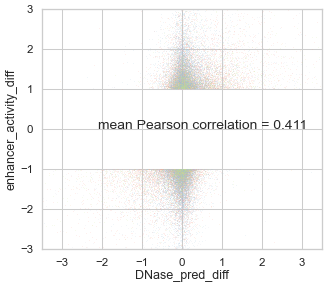

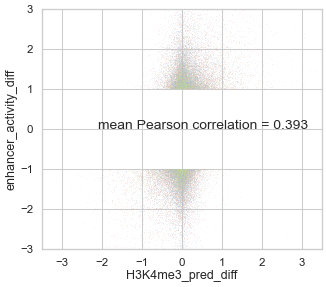

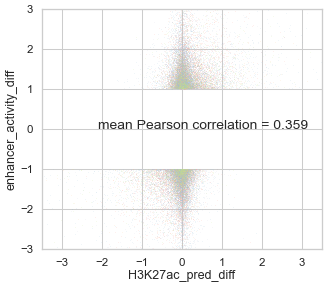

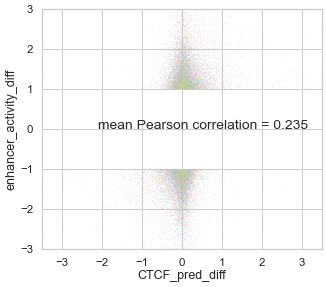

In [32]:
# MPRA 变异效应
assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

r_array = pd.DataFrame(index=cell_types, columns=assays)

for assay in assays:
    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    # xs = []
    # ys = []
    
    for i, cell_type in enumerate(cell_types):
        x = main_df[f'{cell_type}_{assay}_pred_logit_1'] - main_df[f'{cell_type}_{assay}_pred_logit_2']
        y = main_df[f'{cell_type}_1'] - main_df[f'{cell_type}_2']
        cond = (y.abs()>1)
        print(cond.sum())
        x = x[cond]
        y = y[cond]
        # xs.append(x)
        # ys.append(y)

        r = pearson(x, y)
        r_array.loc[cell_type, assay] = r

        ax = sns.scatterplot(x=x, y=y, s=1, alpha=0.3, color=color_list[i+1])
        plt.xlim(-3.5, 3.5)
        plt.ylim(-3, 3)
        plt.xlabel(f'{assay}_pred_diff')
        plt.ylabel(f'enhancer_activity_diff')

    plt.text(x=0.2, y=0.5, fontsize=20, transform=ax.transAxes,
             s=f'mean Pearson correlation = {r_array[assay].mean():.3f}', )
    plt.savefig(f'figures/scatter_plot_{assay}.png', dpi=800)

print(r_array)
# r_array.to_csv('data/pearson_r_matrix.csv', float_format='%.3f')

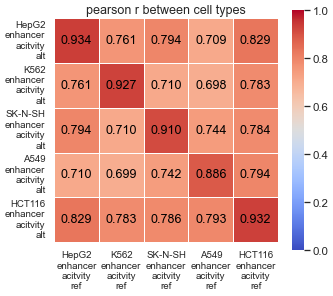

In [13]:
# activity_1 和 activity_2 相关性

assays = ['DNase']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

for assay in assays:
    corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            x = main_df[f'{cell_types[i]}_1']
            y = main_df[f'{cell_types[j]}_2']
            corr_matrix[i][j] = pearson(x, y)

    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    sns.heatmap(corr_matrix, square=True, linewidths=1, 
                cmap='coolwarm', vmin=0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\nenhancer\nacitvity\nref' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\nenhancer\nacitvity\nalt' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.title(f'pearson r between cell types')
    plt.savefig(f'figures/heatmap_pearson_r_{assay}_activity_ref_vs_{assay}_activity_alt.png', dpi=200)
    plt.show()

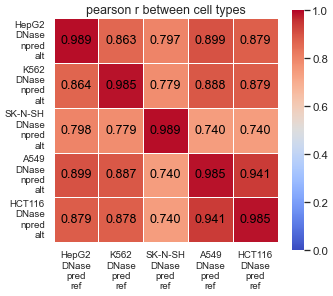

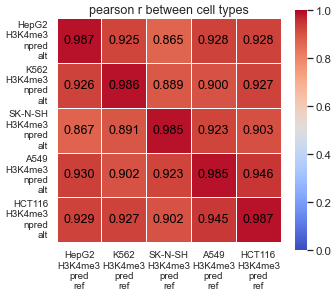

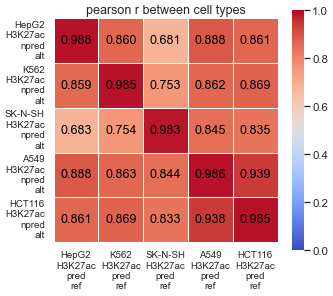

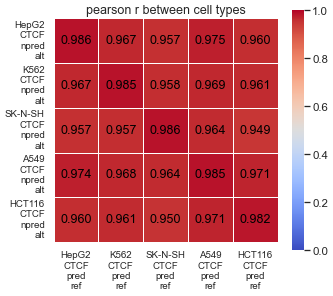

In [12]:
# pred_1 和 pred_2 相关性

assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

for assay in assays:
    corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            x = main_df[f'{cell_types[i]}_{assay}_pred_logit_1']
            y = main_df[f'{cell_types[j]}_{assay}_pred_logit_2']
            corr_matrix[i][j] = pearson(x, y)

    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    sns.heatmap(corr_matrix, square=True, linewidths=1, 
                cmap='coolwarm', vmin=0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\npred\nref' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\nnpred\nalt' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.title(f'pearson r between cell types')
    plt.savefig(f'figures/heatmap_pearson_r_{assay}_pred_ref_vs_{assay}_pred_alt.png', dpi=200)
    plt.show()

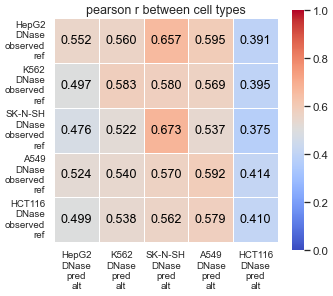

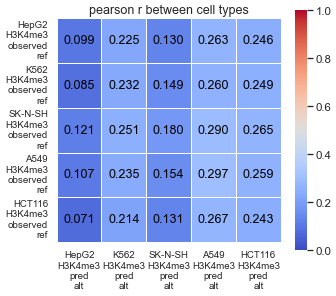

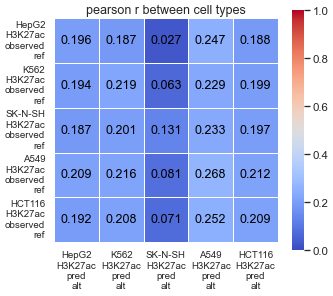

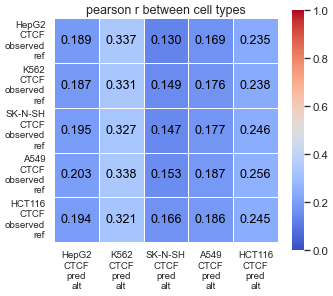

In [50]:
# pred_2 和 observed_1 相关性

assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

for assay in assays:
    corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            x = main_df[f'{cell_types[i]}_{assay}_pred_logit_2']
            y = main_df[f'{cell_types[j]}_{assay}_observed_log_1']
            corr_matrix[i][j] = pearson(x, y)

    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    sns.heatmap(corr_matrix, square=True, linewidths=1, 
                cmap='coolwarm', vmin=0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\npred\nalt' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\nobserved\nref' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.title(f'pearson r between cell types')
    plt.savefig(f'figures/heatmap_pearson_r_{assay}_pred_alt_vs_{assay}_observed_ref.png', dpi=200)
    plt.show()

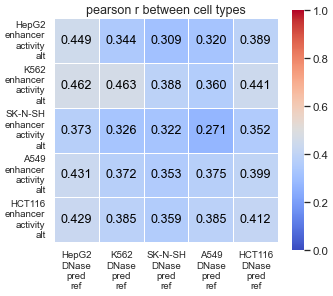

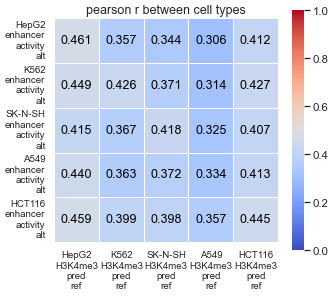

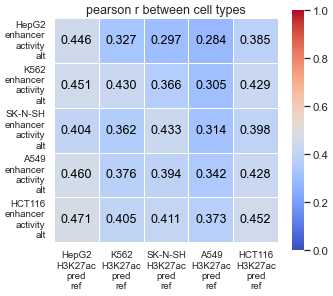

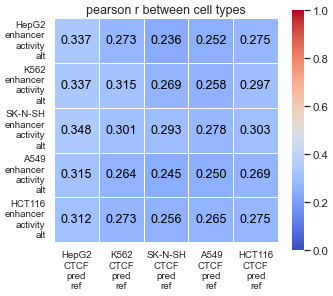

In [34]:
# 子集上 pred_1 和 activity_2 相关性

assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

for assay in assays:
    corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            x = main_df[f'{cell_types[i]}_{assay}_pred_logit_1']
            y = main_df[f'{cell_types[j]}_2']
            cond = (main_df[f'{cell_types[j]}_1'] - main_df[f'{cell_types[j]}_2']).abs() > 1
            x = x[cond]
            y = y[cond]
            corr_matrix[i][j] = pearson(x, y)

    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    sns.heatmap(corr_matrix, square=True, linewidths=1, 
                cmap='coolwarm', vmin=0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\npred\nref' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\nenhancer\nactivity\nalt' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.title(f'pearson r between cell types')
    plt.savefig(f'figures/heatmap_pearson_r_{assay}_pred_ref_vs_enhancer_activity_alt_subset.png', dpi=200)
    plt.show()

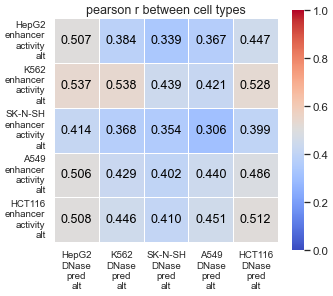

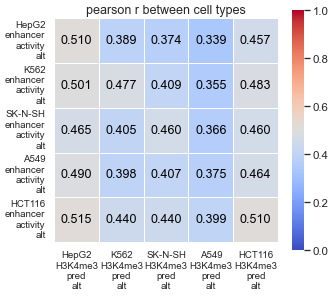

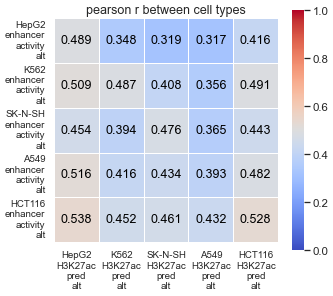

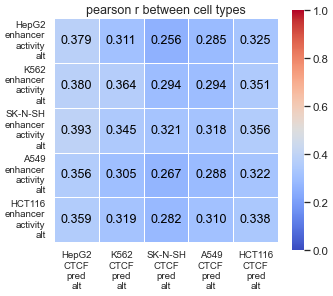

In [33]:
# 子集上 pred_2 和 activity_2 相关性

assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

for assay in assays:
    corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            x = main_df[f'{cell_types[i]}_{assay}_pred_logit_2']
            y = main_df[f'{cell_types[j]}_2']
            cond = (main_df[f'{cell_types[j]}_1'] - main_df[f'{cell_types[j]}_2']).abs() > 1
            x = x[cond]
            y = y[cond]
            corr_matrix[i][j] = pearson(x, y)

    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    sns.heatmap(corr_matrix, square=True, linewidths=1, 
                cmap='coolwarm', vmin=0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\npred\nalt' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\nenhancer\nactivity\nalt' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.title(f'pearson r between cell types')
    plt.savefig(f'figures/heatmap_pearson_r_{assay}_pred_alt_vs_enhancer_activity_alt_subset.png', dpi=200)
    plt.show()

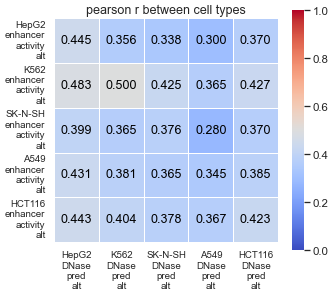

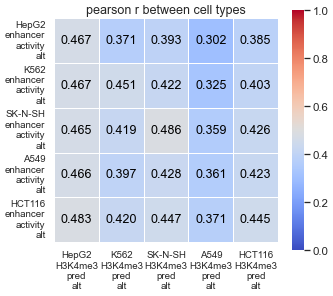

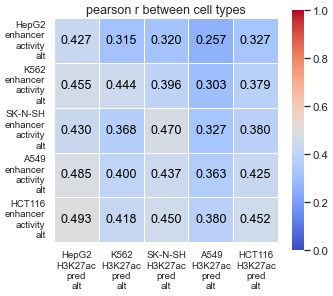

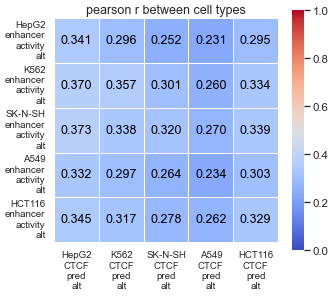

In [14]:
# pred_2 和 activity_2 相关性

assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

for assay in assays:
    corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            x = main_df[f'{cell_types[i]}_{assay}_pred_logit_2']
            y = main_df[f'{cell_types[j]}_2']
            corr_matrix[i][j] = pearson(x, y)

    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    sns.heatmap(corr_matrix, square=True, linewidths=1, 
                cmap='coolwarm', vmin=0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\npred\nalt' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\nenhancer\nactivity\nalt' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.title(f'pearson r between cell types')
    plt.savefig(f'figures/heatmap_pearson_r_{assay}_pred_alt_vs_enhancer_activity_alt.png', dpi=200)
    plt.show()

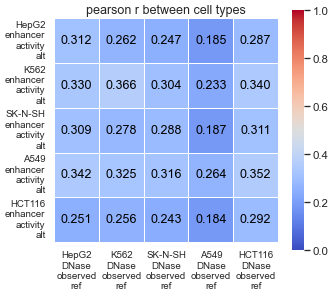

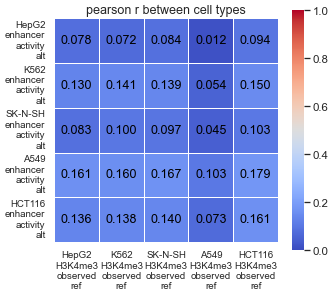

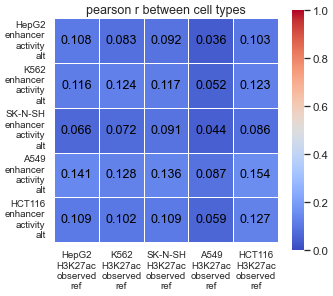

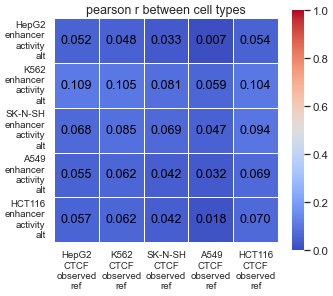

In [15]:
# observed_1 和 activity_2 的相关性

assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

for assay in assays:
    corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            x = main_df[f'{cell_types[i]}_{assay}_observed_log_1']
            y = main_df[f'{cell_types[j]}_2']
            corr_matrix[i][j] = pearson(x, y)
            # corr_matrix[i][j] = pearson(x, y)

    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    sns.heatmap(corr_matrix, square=True, linewidths=1, 
                cmap='coolwarm', vmin=0, vmax=1, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\nobserved\nref' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\nenhancer\nactivity\nalt' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.title(f'pearson r between cell types')
    plt.savefig(f'figures/heatmap_pearson_r_{assay}_observed_ref_vs_enhancer_activity_alt.png', dpi=200)
    plt.show()

In [47]:
# cell_types = ['HepG2', 'K562', 'A549', 'HCT116']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

data_split_dict = {}
data_split_dict['total'] = np.ones(len(main_df), dtype=bool)
data_split_dict['chrom'] = main_df['chr'].isin([f'chr{i}' for i in range(1, 23)])
data_split_dict['train'] = main_df['chr'].isin([f'chr{i}' for i in range(3, 23)])
data_split_dict['valid'] = main_df['chr'].isin(['chr1'])
data_split_dict['test'] = main_df['chr'].isin(['chr2'])
data_split_dict['designed'] = main_df['chr'].isin(['chr0'])

# data_split_dict['ref'] = main_df['is_ref']
# data_split_dict['alt'] = ~main_df['is_ref']

cell_types = ['HepG2_1', 'K562_1', 'SK-N-SH_1', 'A549_1', 'HCT116_1']
stds = main_df[cell_types].std(axis=1, skipna=True)
threshold = np.percentile(stds.dropna(), 90)
data_split_dict['diff'] = (stds > threshold)
data_split_dict['const'] = ~data_split_dict['diff']


keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}_{k2}'] = data_split_dict[k1] & data_split_dict[k2]

In [50]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
data_splits = ['train', 'test', 'test_const', 'test_diff']

for i, assay in enumerate(assays):
    r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
    r_array = pd.DataFrame(r_array, index=cell_types, columns=data_splits)
    for j, cell_type in enumerate(cell_types):
        for k, data_split in enumerate(data_splits):
            condition = data_split_dict[data_split]
            x = main_df[condition][f'{cell_type}_1']
            y = main_df[condition][f'{cell_type}_{assay}_pred_logit_1']
            r = pearson(x, y)
            r_array.loc[cell_type, data_split] = r
    print(assay)
    print(r_array)
    print()




for i, assay in enumerate(assays):
    r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
    r_array = pd.DataFrame(r_array, index=cell_types, columns=data_splits)
    for j, cell_type in enumerate(cell_types):
        for k, data_split in enumerate(data_splits):
            condition = data_split_dict[data_split]
            x = main_df[condition][f'{cell_type}_1']
            y = main_df[condition][f'{cell_type}_{assay}_observed_log_1']
            r = pearson(x, y)
            r_array.loc[cell_type, data_split] = r
    print(assay)
    print(r_array)
    print()

DNase
            train      test  test_const  test_diff
HepG2    0.447165  0.429078    0.331553   0.484435
K562     0.502216  0.472914    0.367082   0.478945
SK-N-SH  0.377616  0.346310    0.277234   0.345345
A549     0.345737  0.334247    0.227515   0.339381
HCT116   0.424992  0.407454    0.292661   0.524613

H3K4me3
            train      test  test_const  test_diff
HepG2    0.468159  0.454381    0.367388   0.538070
K562     0.452660  0.431998    0.333379   0.465493
SK-N-SH  0.486971  0.463588    0.380469   0.530113
A549     0.359863  0.359149    0.260932   0.372247
HCT116   0.446048  0.444369    0.333629   0.608614

H3K27ac
            train      test  test_const  test_diff
HepG2    0.428150  0.422137    0.332684   0.499446
K562     0.445035  0.428224    0.326784   0.435084
SK-N-SH  0.469390  0.451209    0.381838   0.467620
A549     0.359771  0.364421    0.266129   0.354537
HCT116   0.451912  0.450482    0.349287   0.543698

CTCF
            train      test  test_const  test_diff
H